### Generative Adversarial Networks (GAN) Application Case Study through MNIST

#### Project Objective and ideas

To explore more advanced areas in deep learning after course works, I selected Generative Adversarial Networks and it’s variants, which are becoming the most important algorithm pattern in Deep Learning. MNIST Dataset’s simplicity on implementation makes it the great fit for learning the GAN concept. 

The Python code including two parts: 
1. Expolore the MNIST Dataset and Element Insights, which is the foundation on learning the Data Transformation in GAN
2. A simple GAN Model composed by a Generator (by Feed Forward Network) and a Discriminator (by Feed Forward Network)

Some testing results have been reviewed and analyzed.  

#### 1. Expolore the MNIST Dataset and Element Insights
This section explores MNIST Data from following two perspectives. The classification of digital number is the foundation of GAN Models. 

* Overall MNIST Dataset  
* One MNIST element transform

In [93]:
import pip

try:
    __import__('keras')
except ImportError:
    pip.main(['install', 'keras']) 
    
try:
    __import__('h5py')
except ImportError:
    pip.main(['install', 'h5py']) 

import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from keras.utils import to_categorical, np_utils
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [94]:
# Let Keras know that we are using tensorflow as our backend engine
os.environ["KERAS_BACKEND"] = "tensorflow"

# To make sure that we can reproduce the experiment and get the same results
seed = 1337
np.random.seed(seed)

# The dimension of our random noise vector.
random_dim = 100

In [95]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [96]:
y_train.shape, y_train[0]

((60000,), 5)

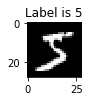

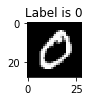

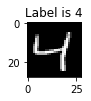

Below from test set


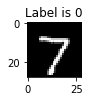

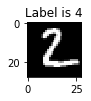

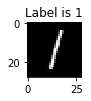

In [97]:
ix = 0
for digit in x_train[:3]:
    figsize=(1,1)
    plt.figure(figsize=figsize)
    plt.title('Label is {label}'.format(label=y_train[ix]))
    plt.imshow(digit, cmap='gray')
    plt.show()
    ix += 1

print('Below from test set')

for digit in x_test[:3]:
    figsize=(1,1)
    plt.figure(figsize=figsize)
    plt.title('Label is {label}'.format(label=y_test[ix]))
    #plt.tight_layout()
    plt.imshow(digit, cmap='gray', interpolation='nearest')
    plt.show()
    ix += 1

In [98]:
# 60000 samples in the trainset and 10000 samples in the testset
# Each picture has 28 x 29 pixal. 
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [99]:
x_train[0].shape, x_test[0].shape, y_train[0].shape, y_test[0].shape  

((28, 28), (28, 28), (), ())

In [100]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [101]:
print (y_train[0])

5


In [102]:
#x_train = (x_train.astype(np.float32) - 127.5)/127.5
#x_train = x_train.reshape(x_train.shape[0], 784)
#y_train = np_utils.to_categorical(y_train)

#x_test = (x_test.astype(np.float32) - 127.5)/127.5
#x_test = x_test.reshape(x_test.shape[0], 784)
#y_test = np_utils.to_categorical(y_test)

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = x_train/255
x_test = x_test/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [103]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [104]:
x_train[0].shape, x_test[0].shape

((784,), (784,))

In [105]:
print (x_train[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [106]:
print (y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [107]:
def make_model(num_layers):
    model = Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim=num_classes, input_dim=x_train.shape[1], activation = 'softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
        if i ==0:
            model.add(Dense(output_dim=num_hidden_neurons, input_dim=x_train.shape[1], activation = 'relu'))
        else:
            model.add(Dense(output_dim=num_hidden_neurons, activation = 'relu'))
    model.add(Dense(output_dim=num_classes, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [108]:
(x_train.shape[0],x_train.shape[1])

(60000, 784)

In [109]:
#Initialize Model
model = make_model(num_layers=0)
print (model.summary())
print ('____________________________')
print ('Training Model')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs, validation_split=validation)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", input_dim=784, units=10)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
____________________________
Training Model
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 0s - loss: 1.4288 - acc: 0.6519 - val_loss: 0.9346 - val_acc: 0.8121
Epoch 2/10
45000/45000 [==============================] - 0s - loss: 0.8140 - acc: 0.8226 - val_loss: 0.6855 - val_acc: 0.8475
Epoch 3/10
45000/45000 [==============================] - 0s - loss: 0.6558 - acc: 0.8475 - val_loss: 0.5851 - val_acc: 0.8613
Epoch 4/10
45000/45000 [==============================] - 0s - loss: 0.5799 - acc: 0.8605 - val_loss: 0.5300 - val_acc: 0.8698
Epoch 5/10
45000/45000 [==============================] - 0s 

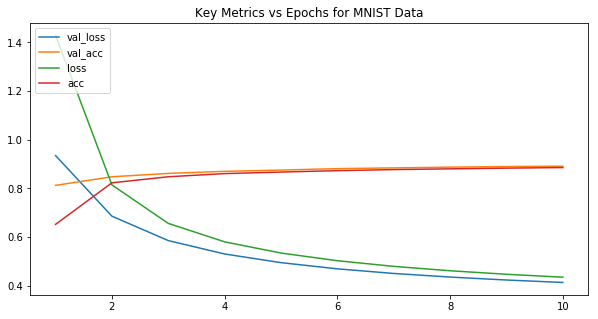

In [110]:
plt.rcParams["figure.figsize"] = (10, 5)

for key in history.history.keys():
    plt.plot(range(1, nb_epochs+1), history.history[key])

plt.legend(list(history.history.keys()), loc = 'upper left')
plt.title('Key Metrics vs Epochs for MNIST Data')
plt.show()

In [111]:
nb_epochs = 10
batch_size = 128
num_classes = 10
num_hidden_neurons = 256
validation = 0.25

In [112]:
# Let Keras know that we are using tensorflow as our backend engine
os.environ["KERAS_BACKEND"] = "tensorflow"

# To make sure that we can reproduce the experiment and get the same results
seed = 1337
np.random.seed(seed)

# The dimension of our random noise vector.
random_dim = 100

In [113]:
# load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

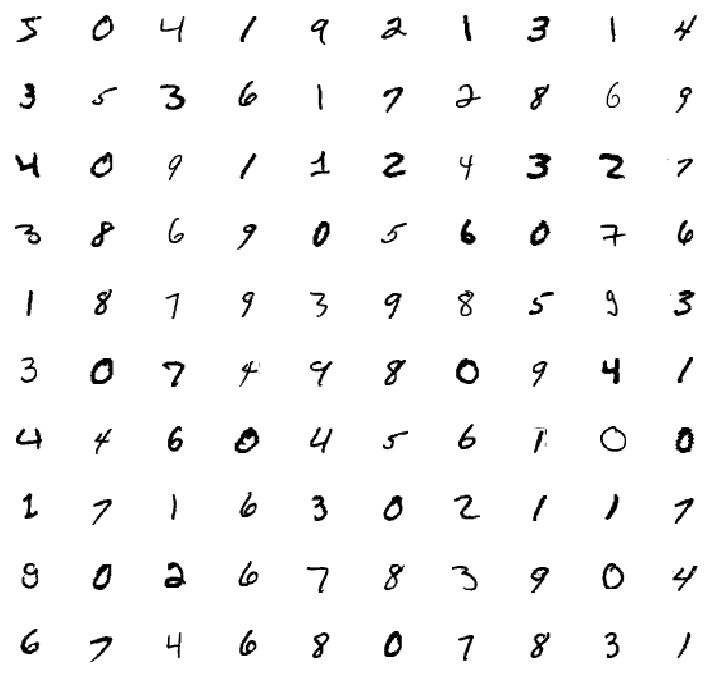

In [114]:
# Create a wall of MNIST images in the dataset

figsize=(10,10)
plt.figure(figsize=figsize)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray_r', interpolation='nearest')
    #plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [115]:
# normalize our inputs to be in the range[-1, 1]
# convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have 784 columns per row

#x_train = x_train.reshape(x_train.shape[0], 784)
#x_train = x_train.astype(np.float32)
#x_train = x_train/255
#y_train = np_utils.to_categorical(y_train)

x_train = (x_train.astype(np.float32) - 127.5)/127.5
x_train = x_train.reshape(x_train.shape[0], 784)
y_train = np_utils.to_categorical(y_train)

In [116]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 28, 28), (10000,))

In [117]:
print (x_train[0])
print (y_train[0])

[-1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.         -1.

In [118]:
# You will use the Adam optimizer
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [119]:
def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

        
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [120]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    # We initially set trainable to False since we only want to train either the
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    # the output of the generator (an image)
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [121]:
# Create a wall of generated MNIST images
def plot_generated_images(epoch, generator, examples=25, dim=(5, 5), figsize=(5, 5)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


100%|██████████| 468/468 [01:06<00:00,  7.03it/s]


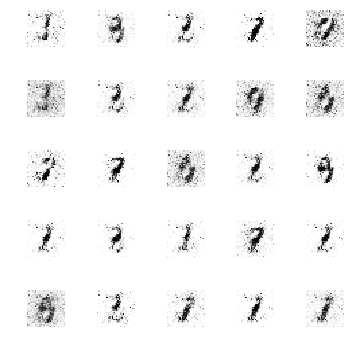

In [122]:
epochs=1
batch_size=128
    
# Split the training data into batches of size 128
batch_count = x_train.shape[0] // batch_size

# Build up the GAN netowrk
adam = get_optimizer()
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, random_dim, generator, adam)

for e in range(1, epochs+1):
    print ('-'*15, 'Epoch %d' % e, '-'*15)
    for _ in tqdm(range(batch_count)):
        # Get a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size, random_dim])
        image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

        # Generate fake MNIST images
        generated_images = generator.predict(noise)
        X = np.concatenate([image_batch, generated_images])

        # Labels for generated and real data
        y_dis = np.zeros(2*batch_size)
        # One-sided label smoothing
        y_dis[:batch_size] = 0.9

        # Train discriminator
        discriminator.trainable = True
        discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.normal(0, 1, size=[batch_size, random_dim])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    if e == 1 or e % 20 == 0:
        plot_generated_images(e, generator)